
Encoding message: 'abcab'
Symbol probabilities:
P('a') = 0.6
P('b') = 0.3
P('c') = 0.1

Encoded value: 0.5301
Decoded message: 'abcab'


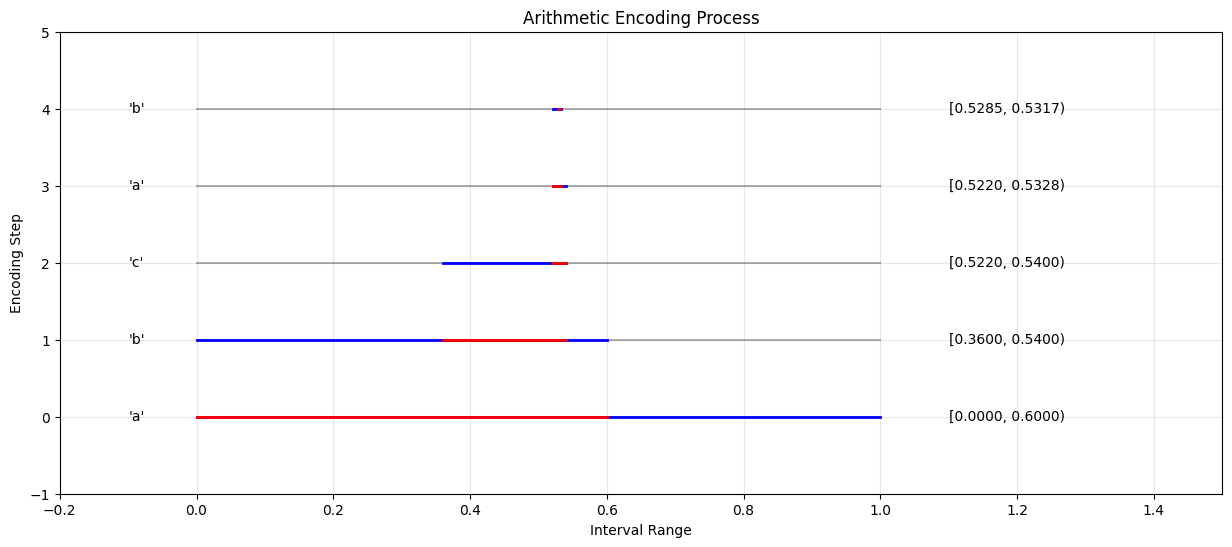


Compression Analysis:
Original size (ASCII): 40 bits
Entropy: 1.30 bits per symbol
Theoretical minimum size: 6.48 bits


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal, getcontext
from collections import Counter

# Set precision for decimal calculations
getcontext().prec = 100

class ArithmeticCoding:
    def __init__(self, symbols=None, probabilities=None):
        """Initialize the arithmetic coder with symbols and their probabilities."""
        if symbols is None or probabilities is None:
            self.symbols = None
            self.probabilities = None
            self.cumulative_prob = None
        else:
            self.set_probabilities(symbols, probabilities)

    def set_probabilities(self, symbols, probabilities):
        """Set up the probability ranges for each symbol."""
        self.symbols = symbols
        self.probabilities = probabilities

        # Calculate cumulative probabilities
        self.cumulative_prob = {}
        cumulative = Decimal('0')
        for symbol, prob in zip(symbols, probabilities):
            self.cumulative_prob[symbol] = cumulative
            cumulative += Decimal(str(prob))

    def get_symbol_range(self, symbol):
        """Get the range [low, high) for a symbol."""
        low = self.cumulative_prob[symbol]
        high = low + Decimal(str(self.probabilities[self.symbols.index(symbol)]))
        return low, high

    def encode(self, message):
        """Encode a message using arithmetic coding."""
        low = Decimal('0')
        high = Decimal('1')
        steps = []  # Store steps for visualization

        for symbol in message:
            # Calculate new interval
            range_size = high - low
            symbol_low, symbol_high = self.get_symbol_range(symbol)

            new_high = low + range_size * symbol_high
            new_low = low + range_size * symbol_low

            # Store step for visualization
            steps.append({
                'symbol': symbol,
                'old_range': (float(low), float(high)),
                'new_range': (float(new_low), float(new_high)),
                'symbol_range': (float(symbol_low), float(symbol_high))
            })

            # Update interval
            low, high = new_low, new_high

        # Return middle of final interval
        return (low + high) / 2, steps

    def decode(self, encoded_value, message_length):
        """Decode a message from an encoded value."""
        value = Decimal(str(encoded_value))
        decoded_message = []
        steps = []  # Store steps for visualization

        current_value = value
        for _ in range(message_length):
            # Find symbol whose range contains current value
            for symbol in self.symbols:
                low, high = self.get_symbol_range(symbol)
                if low <= current_value < high:
                    decoded_message.append(symbol)

                    # Scale value back to [0,1)
                    current_value = (current_value - low) / (high - low)

                    # Store step for visualization
                    steps.append({
                        'symbol': symbol,
                        'value': float(current_value),
                        'range': (float(low), float(high))
                    })
                    break

        return decoded_message, steps

def visualize_encoding(steps, title="Arithmetic Encoding Process"):
    """Visualize the encoding process showing how intervals are subdivided."""
    plt.figure(figsize=(15, len(steps)*1.2))
    plt.title(title)

    for i, step in enumerate(steps):
        # Draw the full interval
        plt.plot([0, 1], [i, i], 'k-', alpha=0.3)

        # Draw the current interval
        old_low, old_high = step['old_range']
        plt.plot([old_low, old_high], [i, i], 'b-', linewidth=2)

        # Draw the new interval
        new_low, new_high = step['new_range']
        plt.plot([new_low, new_high], [i, i], 'r-', linewidth=2)

        # Add symbol and range information
        plt.text(-0.1, i, f"'{step['symbol']}'", verticalalignment='center')
        plt.text(1.1, i, f"[{new_low:.4f}, {new_high:.4f})",
                verticalalignment='center')

    plt.ylim(-1, len(steps))
    plt.xlim(-0.2, 1.5)
    plt.grid(True, alpha=0.3)
    plt.xlabel("Interval Range")
    plt.ylabel("Encoding Step")
    plt.show()

def demonstrate_arithmetic_coding():
    """Demonstrate arithmetic coding with a simple example."""
    # Example message and probabilities
    symbols = ['a', 'b', 'c']
    probabilities = [0.6, 0.3, 0.1]  # Probabilities sum to 1
    message = "abcab"

    # Create arithmetic coder
    coder = ArithmeticCoding(symbols, probabilities)

    # Encode message
    print(f"\nEncoding message: '{message}'")
    print("Symbol probabilities:")
    for s, p in zip(symbols, probabilities):
        print(f"P('{s}') = {p}")

    encoded_value, encoding_steps = coder.encode(message)
    print(f"\nEncoded value: {float(encoded_value)}")

    # Decode message
    decoded_message, decoding_steps = coder.decode(encoded_value, len(message))
    decoded_text = ''.join(decoded_message)
    print(f"Decoded message: '{decoded_text}'")

    # Visualize encoding process
    visualize_encoding(encoding_steps)

    # Calculate compression statistics
    original_bits = len(message) * 8  # Assuming 8 bits per character
    # Calculate entropy
    entropy = -sum(p * np.log2(p) for p in probabilities)
    theoretical_bits = len(message) * entropy

    print("\nCompression Analysis:")
    print(f"Original size (ASCII): {original_bits} bits")
    print(f"Entropy: {entropy:.2f} bits per symbol")
    print(f"Theoretical minimum size: {theoretical_bits:.2f} bits")

    return coder, encoding_steps, decoding_steps

# Run demonstration
demo_coder, encoding_steps, decoding_steps = demonstrate_arithmetic_coding()

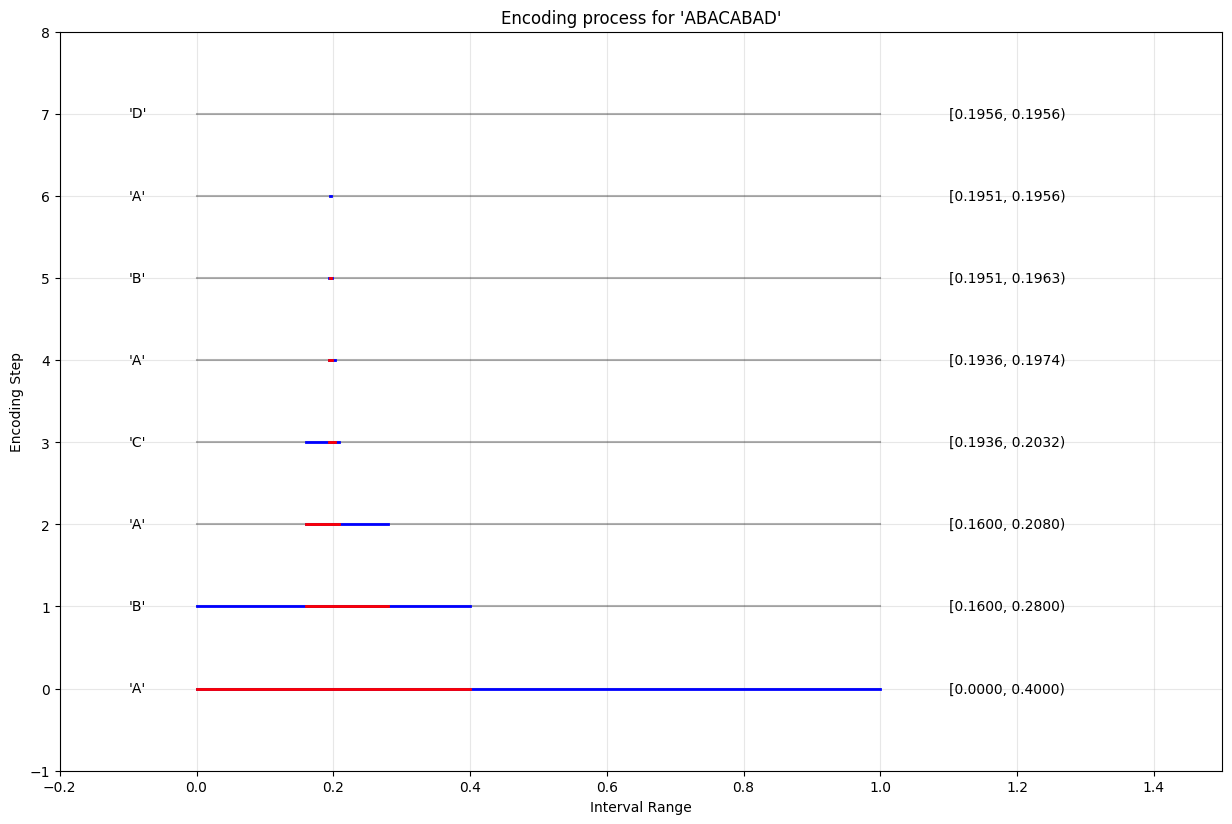

In [2]:
# Example with different probabilities
symbols = ['A', 'B', 'C', 'D']
probabilities = [0.4, 0.3, 0.2, 0.1]
message = "ABACABAD"

coder = ArithmeticCoding(symbols, probabilities)
encoded_value, steps = coder.encode(message)
decoded_message, _ = coder.decode(encoded_value, len(message))

# Visualize the encoding process
visualize_encoding(steps, f"Encoding process for '{message}'")